## Load Libraries

In [45]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import scipy.stats as stats
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as pylab
#configure visualizations
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

# # Modelling Helpers
# from sklearn.preprocessing import Imputer , Normalizer , scale
# from sklearn.cross_validation import train_test_split , StratifiedKFold
# from sklearn.feature_selection import RFECV

pd.options.display.max_columns=100

## Load Data

In [61]:
train = pd.read_csv('train.csv')
print(train.shape)
testM = pd.read_csv('test.csv')
print(testM.shape)
#combine = [train, testM]

features = pd.concat([train, testM], keys=['train', 'test'])
featuresM = features
features.head()

(1460, 81)
(1459, 80)


1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
train 0       856       854          0   NaN             3     1Fam       TA   
      1      1262         0          0   NaN             3     1Fam       TA   
      2       920       866          0   NaN             3     1Fam       TA   
      3       961       756          0   NaN             3     1Fam       Gd   
      4      1145      1053          0   NaN             4     1Fam       TA   

        BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
train 0           No       706.0         0.0          GLQ          Unf   
      1           Gd       978.0         0.0          ALQ          Unf   
      2           Mn       486.0         0.0          GLQ          Unf   
      3           No       216.0         0.0          ALQ          Unf   
      4           Av       655.0         0.0          GLQ          Unf   

         BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
train 0           1.0           0.0       Gd      150.0          Y       Norm   
      1           0.0           1.0       Gd      284.0          Y      Feedr   
      2           1.0           0.0       Gd      434.0          Y       Norm   
      3           1.0           0.0       TA      540.0          Y       Norm   
      4           1.0           0.0       Gd      490.0          Y       Norm   

        Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
train 0       Norm      SBrkr              0        TA        Gd     VinylSd   
      1       Norm      SBrkr              0        TA        TA     MetalSd   
      2       Norm      SBrkr              0        TA        Gd     VinylSd   
      3       Norm      SBrkr            272        TA        TA     Wd Sdng   
      4       Norm      SBrkr              0        TA        Gd     VinylSd   

        Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath  \
train 0     VinylSd   NaN         NaN           0      PConc         2   
      1     MetalSd   NaN          TA           1     CBlock         2   
      2     VinylSd   NaN          TA           1      PConc         2   
      3     Wd Shng   NaN          Gd           1     BrkTil         1   
      4     VinylSd   NaN          TA           1      PConc         2   

        Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
train 0        Typ       548.0         2.0         TA          RFn         TA   
      1        Typ       460.0         2.0         TA          RFn         TA   
      2        Typ       608.0         2.0         TA          RFn         TA   
      3        Typ       642.0         3.0         TA          Unf         TA   
      4        Typ       836.0         3.0         TA          RFn         TA   

        GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
train 0     Attchd       2003.0       1710         1    GasA        Ex   
      1     Attchd       1976.0       1262         0    GasA        Ex   
      2     Attchd       2001.0       1786         1    GasA        Ex   
      3     Detchd       1998.0       1717         0    GasA        Gd   
      4     Attchd       2000.0       2198         1    GasA        Ex   

        HouseStyle  Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
train 0     2Story   1             1          Gd         Lvl       Gtl   
      1     1Story   2             1          TA         Lvl       Gtl   
      2     2Story   3             1          Gd         Lvl       Gtl   
      3     2Story   4             1          Gd         Lvl       Gtl   
      4     2Story   5             1          Gd         Lvl       Gtl   

         LotArea LotConfig  LotFrontage LotShape  LowQualFinSF  MSSubClass  \
train 0     8450    Inside         65.0      Reg             0          60   
      1     9600       FR2         80.0      Reg             0          20   
      2    11250    Inside         68.0      IR1           

In [47]:
features.columns.values

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive',
       'PoolAre

In [9]:
#featSelect = list(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath', 
#                   'YearBuilt', 'SalePrice', 'ExterQual', 'BsmtQual',
#                   'FireplaceQu', 'HeatingQC', 'GarageFinish', 'Neighborhood'])
#print(featSelect)
#features = features[featSelect]
#print(features.shape)
#features.head()

## Remove Outliers

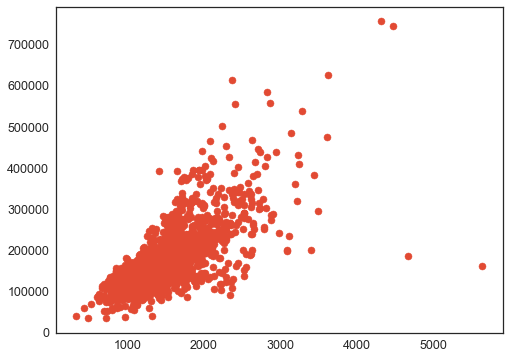

In [48]:
#plt.scatter(trainM['GrLivArea'],trainM['SalePrice'])

plt.scatter(features.loc['train']['GrLivArea'],features.loc['train']['SalePrice'])

In [49]:
gr_outlier = np.where(features.loc['train']['GrLivArea']>4500)
gr_outlier = gr_outlier[0]

features = features.drop(features.index[gr_outlier])
features.shape
#train = train.drop(train.index[train['GrLivArea']>4500])

(2917, 81)

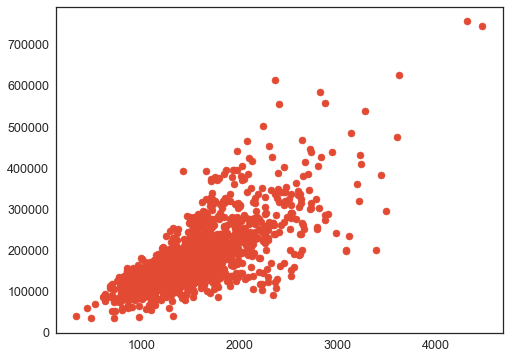

In [50]:
plt.scatter(features.loc['train']['GrLivArea'],features.loc['train']['SalePrice'])

## Address Target Variable

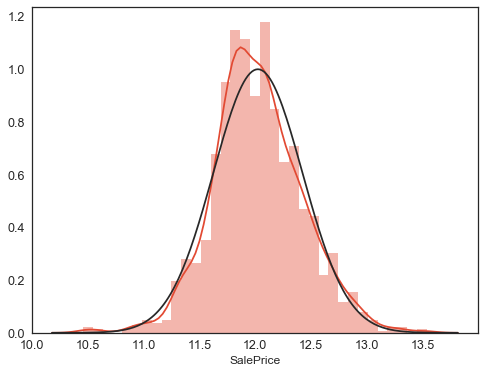

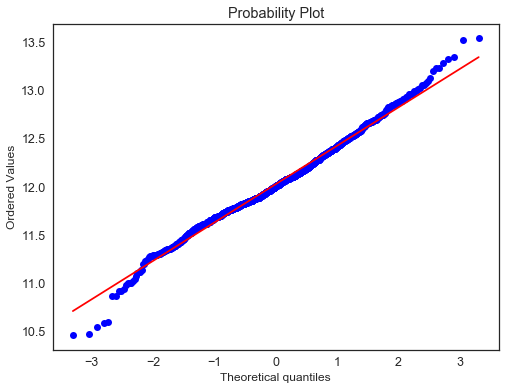

In [56]:
from scipy.stats import norm
sns.distplot(np.log(train['SalePrice']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(train['SalePrice']), plot=plt)

features['SalePrice'] = np.log(features['SalePrice'])

## Missings

In [66]:
testM['MSSubClass'].isnull().sum()

0

In [62]:
percentage_missing = features.isnull().sum()/len(features)*100
percentage_missing = percentage_missing[percentage_missing > 0]
percentage_missing.sort_values(inplace=True, ascending=False)#we use inplace=True to make changes to our columns
print(percentage_missing)

#print(percentage_missing[percentage_missing>0.5])

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageQual       5.447071
GarageCond       5.447071
GarageFinish     5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Functional       0.068517
Electrical       0.034258
BsmtUnfSF        0.034258
Exterior1st      0.034258
Exterior2nd      0.034258
TotalBsmtSF      0.034258
GarageCars       0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
KitchenQual      0.034258
SaleType         0.034258
GarageArea       0.034258
dtype: float64


In [42]:
#drop_features = ['Fence', 'Alley', 'MiscFeature', 'PoolQC']    #maybe include Alley

### Split into Quantitative and Categorical Variables

In [58]:
quantitative = [f for f in features.columns if features.dtypes[f] != 'object']
quantitative.remove('SalePrice')
print(quantitative)

qualitative = [f for f in features.columns if features.dtypes[f] == 'object']
print(qualitative)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']
['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 

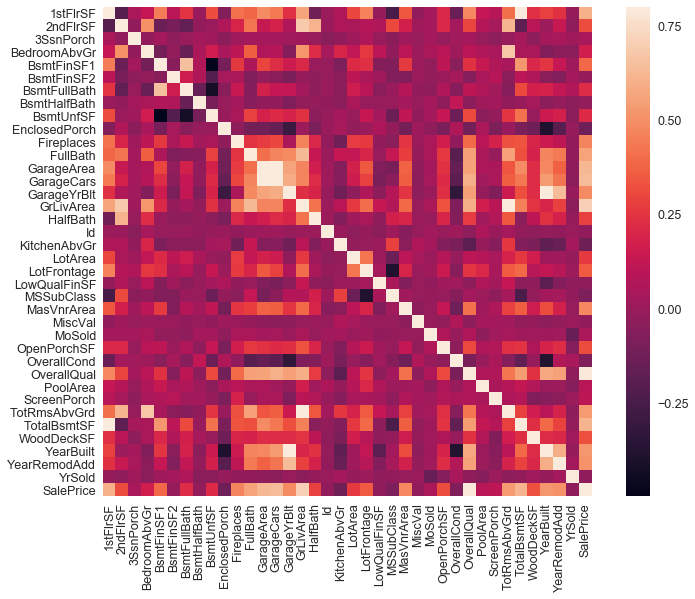

In [59]:
#correlation matrix
corrmat = train[quantitative+list(['SalePrice'])].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### Imputation

In [ ]:
LotFrontage     16.660953

GarageArea       0.034282
'GarageYrBlt',
GarageCars       0.034282

TotalBsmtSF      0.034282
BsmtFinSF2       0.034282
BsmtFinSF1       0.034282
'BsmtFullBath', 'BsmtHalfBath',
BsmtUnfSF        0.034282

MasVnrArea       0.788481

MSZoning         0.137127

Utilities        0.068564

Functional       0.068564

Electrical       0.034282

Exterior1st      0.034282
Exterior2nd      0.034282

KitchenQual      0.034282

SaleType         0.034282



In [170]:
#Fill where missings probably mean none or not present
none_vars = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageQual', 'GarageCond',
            'GarageFinish', 'GarageType', 'BsmtExposure', 'BmstCond', 'BsmtQual',
            'BsmtFinType2', 'BsmtFinType1', 'MasVnrType',  ]
for c in list(qualitative):
    features[c] = features[c].astype('category')
    if features[c].isnull().any():
        features[c] = features[c].cat.add_categories(['MISSING'])
        features[c] = features[c].fillna('MISSING')

In [170]:
for c in list(qualitative):
    features[c] = features[c].astype('category')
    if features[c].isnull().any():
        features[c] = features[c].cat.add_categories(['MISSING'])
        features[c] = features[c].fillna('MISSING')

In [171]:
for c in list(quantitative):
    if features[c].isnull().any():
        features[c] = features[c].fillna(np.nanmean(features[c]))

In [172]:
percentage_missing = features.isnull().sum()/len(features)
percentage_missing = percentage_missing[percentage_missing > 0]
percentage_missing.sort_values(inplace=True)#we use inplace=True to make changes to our columns
print(percentage_missing)

SalePrice    0.500171
dtype: float64


## Categorical Enumeration

In [173]:
quality_vars = list(['ExterQual', 'BsmtQual', 'FireplaceQu', 'HeatingQC'])

for j in quality_vars:
    enumList = list()
    for i in range(0,len(features)):
        if (features[j].iloc[i]=='Ex'):
            enumList.append(5)
        if (features[j].iloc[i]=='Gd'):
            enumList.append(4)
        if (features[j].iloc[i]=='TA'):
            enumList.append(3)
        if (features[j].iloc[i]=='Fa'):
            enumList.append(2)
        if (features[j].iloc[i]=='Po'):
            enumList.append(1)
        if (features[j].iloc[i]=='MISSING'):
            enumList.append(0)
        if (features[j].iloc[i]=='nan'):
            enumList.append(0)
    features[j+'_E'] = enumList

for j in list(['GarageFinish']):
    enumList = list()
    for i in range(0,len(features)):
        if (features[j].iloc[i]=='Fin'):
            enumList.append(3)
        if (features[j].iloc[i]=='RFn'):
            enumList.append(2)
        if (features[j].iloc[i]=='Unf'):
            enumList.append(1)
        if (features[j].iloc[i]=='MISSING'):
            enumList.append(0)
        if (features[j].iloc[i]=='nan'):
            enumList.append(0)
    features[j+'_E'] = enumList

In [174]:
features = features.drop(quality_vars, axis=1)
features = features.drop('GarageFinish', axis=1)

In [175]:
features.head()

OverallQual  GrLivArea  TotalBsmtSF  GarageCars  FullBath  YearBuilt  \
train 0            7       1710        856.0         2.0         2       2003   
      1            6       1262       1262.0         2.0         2       1976   
      2            7       1786        920.0         2.0         2       2001   
      3            7       1717        756.0         3.0         1       1915   
      4            8       2198       1145.0         3.0         2       2000   

         SalePrice Neighborhood  ExterQual_E  BsmtQual_E  FireplaceQu_E  \
train 0   208500.0      CollgCr            4           4              0   
      1   181500.0      Veenker            3           4              3   
      2   223500.0      CollgCr            4           4              3   
      3   140000.0      Crawfor            3           3              4   
      4   250000.0      NoRidge            4           4              3   

         HeatingQC_E  GarageFinish_E  
train 0            5               2  
      1            5               2  
      2            5               2  
      3            4               1  
      4            5               2

## Missing value / Imputations

In [176]:
bsmtFill = list()
for i in range(0,len(features)):
    if features['BsmtQual_E'].iloc[i]==0:
        if features['TotalBsmtSF'].iloc[i]==0:
            bsmtFill.append(0)
        if features['TotalBsmtSF'].iloc[i]>0:
            bsmtFill.append(np.median(features['BsmtQual_E']))
    else:
        bsmtFill.append(features['BsmtQual_E'].iloc[i])

features['BsmtQual_E'] = bsmtFill

In [177]:
fireplaceFill = list()
for i in range(0,len(features)):
    if features['FireplaceQu_E'].iloc[i]==0:
        if featuresM['Fireplaces'].iloc[i]==0:
            fireplaceFill.append(0)
        if featuresM['Fireplaces'].iloc[i]>0:
            fireplaceFill.append(np.median(features['FireplaceQu_E']))
    else:
        fireplaceFill.append(features['FireplaceQu_E'].iloc[i])
        
features['FireplaceQu_E'] = fireplaceFill

In [178]:
garagefinishFill = list()
for i in range(0,len(features)):
    if features['GarageFinish_E'].iloc[i]==0:
        if featuresM['GarageArea'].iloc[i]==0:
            garagefinishFill.append(0)
        if np.isnan(featuresM['GarageArea'].iloc[i]):
            garagefinishFill.append(0)
        if featuresM['GarageArea'].iloc[i]>0:
            garagefinishFill.append(np.median(features['GarageFinish_E']))
    else:
        garagefinishFill.append(features['GarageFinish_E'].iloc[i])
        
features['GarageFinish_E'] = garagefinishFill

In [179]:
print(features.shape)
features.head()

(2917, 13)


OverallQual  GrLivArea  TotalBsmtSF  GarageCars  FullBath  YearBuilt  \
train 0            7       1710        856.0         2.0         2       2003   
      1            6       1262       1262.0         2.0         2       1976   
      2            7       1786        920.0         2.0         2       2001   
      3            7       1717        756.0         3.0         1       1915   
      4            8       2198       1145.0         3.0         2       2000   

         SalePrice Neighborhood  ExterQual_E  BsmtQual_E  FireplaceQu_E  \
train 0   208500.0      CollgCr            4         4.0            0.0   
      1   181500.0      Veenker            3         4.0            3.0   
      2   223500.0      CollgCr            4         4.0            3.0   
      3   140000.0      Crawfor            3         3.0            4.0   
      4   250000.0      NoRidge            4         4.0            3.0   

         HeatingQC_E  GarageFinish_E  
train 0            5             2.0  
      1            5             2.0  
      2            5             2.0  
      3            4             1.0  
      4            5             2.0

## Create Dummy Variables

In [180]:
print(quantitative)
qualitative = ['Neighborhood', 'ExterQual_E', 'BsmtQual_E', 'FireplaceQu_E', 'HeatingQC_E', 'GarageFinish_E']
print(qualitative)

def num2cat(x):
    return str(x)

print(features.shape)

for i in qualitative:
    features[i + '_str'] = features[i].apply(num2cat)
    features.pop(i)
    
print(features.shape)

['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt']
['Neighborhood', 'ExterQual_E', 'BsmtQual_E', 'FireplaceQu_E', 'HeatingQC_E', 'GarageFinish_E']
(2917, 13)
(2917, 13)


In [181]:
qualitative = ['Neighborhood_str', 'ExterQual_E_str', 'BsmtQual_E_str', 
               'FireplaceQu_E_str', 'HeatingQC_E_str', 'GarageFinish_E_str']

for i in qualitative:
    one_hot = pd.get_dummies(features[i], prefix=i)
    features = features.drop(i, axis=1)
    features = features.join(one_hot)

print(features.shape)
features.head()

(2917, 56)


OverallQual  GrLivArea  TotalBsmtSF  GarageCars  FullBath  YearBuilt  \
train 0            7       1710        856.0         2.0         2       2003   
      1            6       1262       1262.0         2.0         2       1976   
      2            7       1786        920.0         2.0         2       2001   
      3            7       1717        756.0         3.0         1       1915   
      4            8       2198       1145.0         3.0         2       2000   

         SalePrice  Neighborhood_str_Blmngtn  Neighborhood_str_Blueste  \
train 0   208500.0                         0                         0   
      1   181500.0                         0                         0   
      2   223500.0                         0                         0   
      3   140000.0                         0                         0   
      4   250000.0                         0                         0   

         Neighborhood_str_BrDale  Neighborhood_str_BrkSide  \
train 0                        0                         0   
      1                        0                         0   
      2                        0                         0   
      3                        0                         0   
      4                        0                         0   

         Neighborhood_str_ClearCr  Neighborhood_str_CollgCr  \
train 0                         0                         1   
      1                         0                         0   
      2                         0                         1   
      3                         0                         0   
      4                         0                         0   

         Neighborhood_str_Crawfor  Neighborhood_str_Edwards  \
train 0                         0                         0   
      1                         0                         0   
      2                         0                         0   
      3                         1                         0   
      4                         0                         0   

         Neighborhood_str_Gilbert  Neighborhood_str_IDOTRR  \
train 0                         0                        0   
      1                         0                        0   
      2                         0                        0   
      3                         0                        0   
      4                         0                        0   

         Neighborhood_str_MeadowV  Neighborhood_str_Mitchel  \
train 0                         0                         0   
      1                         0                         0   
      2                         0                         0   
      3                         0                         0   
      4                         0                         0   

         Neighborhood_str_NAmes  Neighborhood_str_NPkVill  \
train 0                       0                         0   
      1                       0                         0   
      2                       0                         0   
      3                       0                         0   
      4                       0                         0   

         Neighborhood_str_NWAmes  Neighborhood_str_NoRidge  \
train 0                        0                         0   
      1                        0                         0   
      2                        0                         0   
      3                        0                         0   
      4                        0                         1   

         Neighborhood_str_NridgHt  Neighborhood_str_OldTown  \
train 0                         0                         0   
      1                         0                         0   
      2                         0                         0   
      3                         0                         0   
      4                         0                         0   

         Neighborhood_str_SWISU  Neighborhood_str_Sawyer  \
train 0        

## Standardizing Numeric

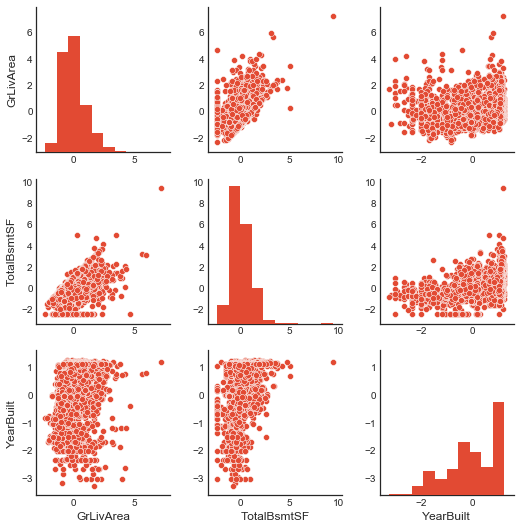

In [182]:
## Standardizing numeric features
numeric_features = features.loc[:,['GrLivArea', 'TotalBsmtSF', 'YearBuilt']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

ax = sns.pairplot(numeric_features_standardized)

GrLivArea      1.068750
TotalBsmtSF    0.676316
YearBuilt     -0.599194
dtype: float64
Index([u'GrLivArea', u'TotalBsmtSF'], dtype='object')
Index([u'GrLivArea', u'TotalBsmtSF'], dtype='object')


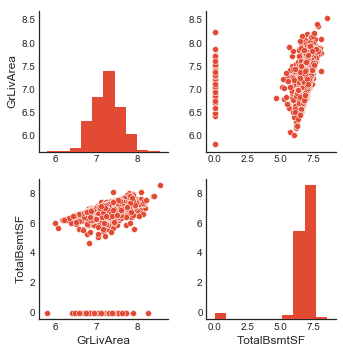

In [183]:
## Adjusting for skew
from scipy.stats import skew 
skewness = numeric_features.apply(lambda x: skew(x))
print(skewness.sort_values(ascending=False))

skewness = skewness[abs(skewness)>0.65]
print(skewness.index)

skew_features = features[skewness.index]
print(skew_features.columns)

#we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.
skew_features = np.log1p(skew_features)

ax = sns.pairplot(skew_features)

In [103]:
features['TotalBsmtSF'] = numeric_features_standardized['TotalBsmtSF']
features['GrLivArea'] = numeric_features_standardized['GrLivArea']
#features['YearBuilt'] = numeric_features_standardized['YearBuilt']

In [184]:
#features['SalePrice'] = np.log(features['SalePrice'])    #or log1p
print(features.shape)
features.head()

(2917, 56)


OverallQual  GrLivArea  TotalBsmtSF  GarageCars  FullBath  YearBuilt  \
train 0            7       1710        856.0         2.0         2       2003   
      1            6       1262       1262.0         2.0         2       1976   
      2            7       1786        920.0         2.0         2       2001   
      3            7       1717        756.0         3.0         1       1915   
      4            8       2198       1145.0         3.0         2       2000   

         SalePrice  Neighborhood_str_Blmngtn  Neighborhood_str_Blueste  \
train 0  12.247694                         0                         0   
      1  12.109011                         0                         0   
      2  12.317167                         0                         0   
      3  11.849398                         0                         0   
      4  12.429216                         0                         0   

         Neighborhood_str_BrDale  Neighborhood_str_BrkSide  \
train 0                        0                         0   
      1                        0                         0   
      2                        0                         0   
      3                        0                         0   
      4                        0                         0   

         Neighborhood_str_ClearCr  Neighborhood_str_CollgCr  \
train 0                         0                         1   
      1                         0                         0   
      2                         0                         1   
      3                         0                         0   
      4                         0                         0   

         Neighborhood_str_Crawfor  Neighborhood_str_Edwards  \
train 0                         0                         0   
      1                         0                         0   
      2                         0                         0   
      3                         1                         0   
      4                         0                         0   

         Neighborhood_str_Gilbert  Neighborhood_str_IDOTRR  \
train 0                         0                        0   
      1                         0                        0   
      2                         0                        0   
      3                         0                        0   
      4                         0                        0   

         Neighborhood_str_MeadowV  Neighborhood_str_Mitchel  \
train 0                         0                         0   
      1                         0                         0   
      2                         0                         0   
      3                         0                         0   
      4                         0                         0   

         Neighborhood_str_NAmes  Neighborhood_str_NPkVill  \
train 0                       0                         0   
      1                       0                         0   
      2                       0                         0   
      3                       0                         0   
      4                       0                         0   

         Neighborhood_str_NWAmes  Neighborhood_str_NoRidge  \
train 0                        0                         0   
      1                        0                         0   
      2                        0                         0   
      3                        0                         0   
      4                        0                         1   

         Neighborhood_str_NridgHt  Neighborhood_str_OldTown  \
train 0                         0                         0   
      1                         0                         0   
      2                         0                         0   
      3                         0                         0   
      4                         0                         0   

         Neighborhood_str_SWISU  Neighborhood_str_Sawyer  \
train 0        

In [185]:
features = features.drop('FireplaceQu_E_str_1.0', axis=1)
features = features.drop('FireplaceQu_E_str_2.0', axis=1)
features = features.drop('FireplaceQu_E_str_3.0', axis=1)
features = features.drop('FireplaceQu_E_str_4.0', axis=1)
features = features.drop('FireplaceQu_E_str_5.0', axis=1)

## Partition Prepared Data

In [186]:
train = features.loc['train']
trainM = train
print(train.shape)
test = features.loc['test']
testM = test
print(test.shape)

(1458, 51)
(1459, 51)


In [187]:
train.to_csv('train_prep.csv')
test.to_csv('test_prep.csv')

In [188]:
train, test = train_test_split(trainM, test_size = 0.1)
#train=trainM
#test=testM

train_x = train.drop('SalePrice', axis=1)
train_y = train['SalePrice']
test_x = test.drop('SalePrice', axis=1)
test_y = test['SalePrice']

# MODELING

In [189]:
lm = LinearRegression()
lm.fit(train_x, train_y)

train_test(lm, train_x, test_x, train_y, test_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2: 0.867661635046
RMSE: 0.134981883587
Test
R2: 0.842700243324
RMSE: 0.158638906271


In [190]:
GBR = GradientBoostingRegressor(n_estimators=12000,
            learning_rate=0.05, max_depth=3, max_features='sqrt',
            min_samples_leaf=15, min_samples_split=10, loss='huber')

GBR.fit(train_x, train_y)

train_test(GBR, train_x, test_x, train_y, test_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=12000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.968366481163
RMSE: 0.0679230517645
Test
R2: 0.815614971954
RMSE: 0.173159658345


In [191]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

lasso.fit(train_x, train_y)

train_test(lasso, train_x, test_x, train_y, test_y)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])
R2: 0.862185176885
RMSE: 0.13651328335
Test
R2: 0.835620372959
RMSE: 0.160337081373


In [192]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

ENet.fit(train_x, train_y)

train_test(ENet, train_x, test_x, train_y, test_y)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False))])
R2: 0.862798212906
RMSE: 0.136302983367
Test
R2: 0.836453263721
RMSE: 0.16011047938


In [111]:
train_x = train.drop('SalePrice', axis=1)
print(train_x.shape)

lm = LinearRegression()
lm.fit(train_x, train['SalePrice'])

(1458, 50)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
test_x = test.drop('SalePrice', axis=1)
print(test_x.shape)

lm_pred = lm.predict(test_x)

(438, 50)


In [113]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test['SalePrice'], lm_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test['SalePrice'], lm_pred))

('Coefficients: \n', array([  7.07717187e-02,   1.36065121e-01,   5.88075428e-02,
         6.06138227e-02,  -2.11542600e-02,   1.68461505e-03,
         9.43937467e+07,   9.43937466e+07,   9.43937466e+07,
         9.43937467e+07,   9.43937469e+07,   9.43937468e+07,
         9.43937469e+07,   9.43937467e+07,   9.43937468e+07,
         9.43937466e+07,   9.43937466e+07,   9.43937467e+07,
         9.43937468e+07,   9.43937467e+07,   9.43937468e+07,
         9.43937468e+07,   9.43937468e+07,   9.43937467e+07,
         9.43937467e+07,   9.43937468e+07,   9.43937468e+07,
         9.43937468e+07,   9.43937469e+07,   9.43937468e+07,
         9.43937469e+07,   1.78378257e+09,   1.78378257e+09,
         1.78378257e+09,   1.78378257e+09,  -1.18610584e+09,
        -1.18610584e+09,  -1.18610584e+09,  -1.18610584e+09,
        -1.18610584e+09,  -1.74169875e-02,   7.42696143e+07,
         7.42696143e+07,   7.42696144e+07,   7.42696144e+07,
         7.42696145e+07,   6.18873518e+08,   6.18873518e+08,
   

In [114]:
pd.DataFrame({'Features': train_x.columns.values, 'LM Coefficients': lm.coef_})

,Features,LM Coefficients
0,OverallQual,7.077172e-02
1,GrLivArea,1.360651e-01
2,TotalBsmtSF,5.880754e-02
3,GarageCars,6.061382e-02
4,FullBath,-2.115426e-02
5,YearBuilt,1.684615e-03
6,Neighborhood_str_Blmngtn,9.439375e+07
7,Neighborhood_str_Blueste,9.439375e+07
8,Neighborhood_str_BrDale,9.439375e+07
9,Neighborhood_str_BrkSide,9.439375e+07


438


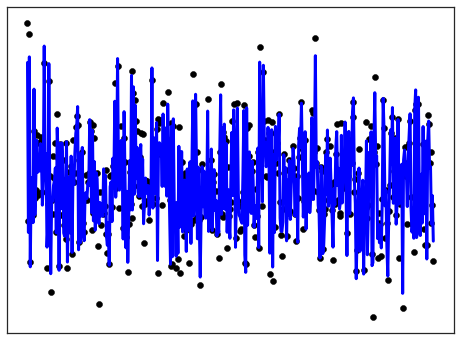

In [115]:
# Plot outputs
plt.scatter(range(0,len(test_x)), test['SalePrice'],  color='black')
plt.plot(range(0,len(test_x)), lm_pred, color='blue', linewidth=3)

print(len(test['SalePrice']))

plt.xticks(())
plt.yticks(())

plt.show()

Text(0.5,1,u'Actual vs. Predicted Prices')

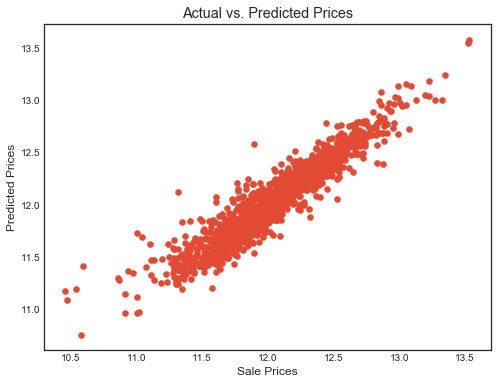

In [116]:
plt.scatter(train['SalePrice'], lm.predict(train_x))
plt.xlabel('Sale Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')

#convert back from log

In [117]:
pred_vals = lm.predict(train_x)
#print(np.where(train['SalePrice']<12.5))
p2 = np.where(train['SalePrice']<12.5)
outl = (np.where(pred_vals[p2]>12.75))
#outl = np.where(pred_vals[np.where(train['SalePrice']<12.5)]>12.75)

#print(p2)
print(outl[0])
print(int(outl[0][0]))
#print(int(outl[0][1]))
print(pred_vals[p2][outl])
pList = [p2][0][0]
#print(len(pList))
#print(pList[[323,889]])
train.iloc[pList[outl[0]]]

[508]
508
[ 12.78344345]


,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt,SalePrice,Neighborhood_str_Blmngtn,Neighborhood_str_Blueste,Neighborhood_str_BrDale,Neighborhood_str_BrkSide,Neighborhood_str_ClearCr,Neighborhood_str_CollgCr,Neighborhood_str_Crawfor,Neighborhood_str_Edwards,Neighborhood_str_Gilbert,Neighborhood_str_IDOTRR,Neighborhood_str_MeadowV,Neighborhood_str_Mitchel,Neighborhood_str_NAmes,Neighborhood_str_NPkVill,Neighborhood_str_NWAmes,Neighborhood_str_NoRidge,Neighborhood_str_NridgHt,Neighborhood_str_OldTown,Neighborhood_str_SWISU,Neighborhood_str_Sawyer,Neighborhood_str_SawyerW,Neighborhood_str_Somerst,Neighborhood_str_StoneBr,Neighborhood_str_Timber,Neighborhood_str_Veenker,ExterQual_E_str_2,ExterQual_E_str_3,ExterQual_E_str_4,ExterQual_E_str_5,BsmtQual_E_str_0.0,BsmtQual_E_str_2.0,BsmtQual_E_str_3.0,BsmtQual_E_str_4.0,BsmtQual_E_str_5.0,FireplaceQu_E_str_0.0,HeatingQC_E_str_1,HeatingQC_E_str_2,HeatingQC_E_str_3,HeatingQC_E_str_4,HeatingQC_E_str_5,GarageFinish_E_str_0.0,GarageFinish_E_str_1.0,GarageFinish_E_str_2.0,GarageFinish_E_str_3.0
581,8,1.094262,2.313748,3.0,2,2008,12.442302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


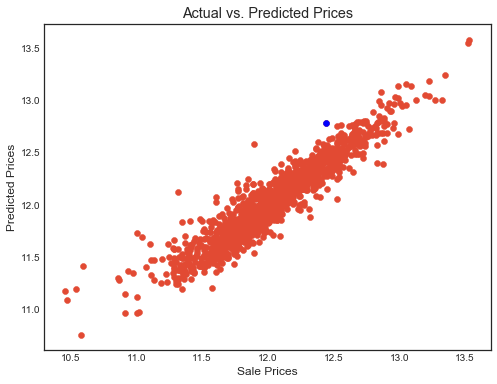

In [118]:
plt.scatter(train['SalePrice'], lm.predict(train_x))
plt.xlabel('Sale Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.scatter(train.iloc[pList[[outl[0]]]]['SalePrice'], pred_vals[p2][outl], color='blue')
#plt.scatter(X[i], Y[i], Z[i], color=colors[i])

#convert back from log

Text(0.5,1,u'Actual vs. Predicted Prices')

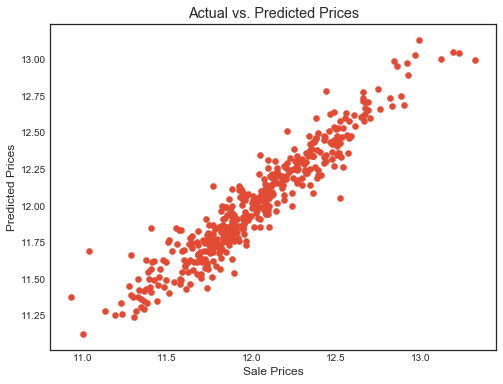

In [119]:
plt.scatter(test['SalePrice'], lm_pred)
plt.xlabel('Sale Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')

#convert back from log

995     121600.0
1046    556581.0
342      87500.0
858     152000.0
754     156000.0
784     128000.0
581     253293.0
485     147000.0
347     157500.0
Name: SalePrice, dtype: float64
12.2476943202


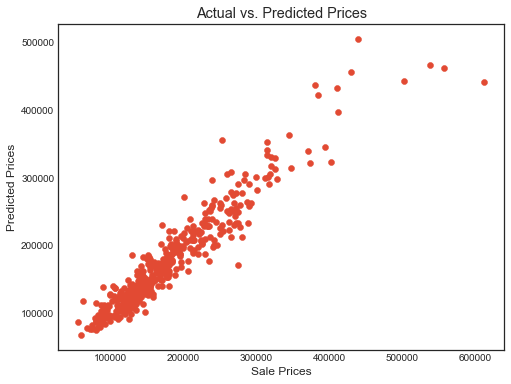

In [120]:
plt.scatter(np.exp(test['SalePrice']), np.exp(lm_pred))
plt.xlabel('Sale Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')

print(np.exp(test['SalePrice'])[1:10])

print(np.log(208500))

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [121]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [122]:
get_score(lm_pred, test['SalePrice'])

R2: 0.893971214606
RMSE: 0.123098134597


In [123]:
train_test(lm, train_x, test_x, train['SalePrice'], test['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2: 0.866597292258
RMSE: 0.137084030295
Test
R2: 0.893971214606
RMSE: 0.123098134597


In [124]:
def error(actual, predicted):
    actual = (actual)
    predicted = (predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

error(test['SalePrice'], lm_pred)

0.12309813459706183

In [125]:
lasso = LassoLarsCV(fit_intercept=True, max_iter=100000)

# Create linear regression object with a ridge coefficient 0.5
#ridge = Ridge(fit_intercept=True, alpha=0.5)

lasso.fit(train_x, train['SalePrice'])

lasso_pred = lasso.predict(test_x)
get_score(lasso_pred, test['SalePrice'])

R2: 0.888103182325
RMSE: 0.124793194139


In [126]:
elastic = ElasticNet(fit_intercept=True, max_iter=100000)

# Create linear regression object with a ridge coefficient 0.5
#ridge = Ridge(fit_intercept=True, alpha=0.5)

elastic.fit(train_x, train['SalePrice'])

elastic_pred = elastic.predict(test_x)
get_score(elastic_pred, test['SalePrice'])

R2: -1.19731604331
RMSE: 0.318413694929


In [127]:
test_orig = pd.read_csv('test.csv')
#print(test_orig['Id'].head())
pred_sub = np.exp(lmM.predict(testM.drop('SalePrice', axis=1)))
submission = pd.DataFrame({'Id': test_orig['Id'], 'SalePrice': pred_sub})
print(submission.head())
submission.to_csv('submission_DTR.csv')

     Id      SalePrice
0  1461  113741.469441
1  1462  145399.050007
2  1463  169087.607139
3  1464  182355.787363
4  1465  221613.851803


In [42]:
lasso = LassoLarsCV(fit_intercept=True, max_iter=100000)

# Create linear regression object with a ridge coefficient 0.5
#ridge = Ridge(fit_intercept=True, alpha=0.5)

lasso.fit(trainM.drop('SalePrice', axis=1), trainM['SalePrice'])

lasso_pred = np.exp(lasso.predict(testM.drop('SalePrice', axis=1)))

submission = pd.DataFrame({'Id': test_orig['Id'], 'SalePrice': lasso_pred})
print(submission.head())
submission.to_csv('submission_lasso_DTR.csv')

     Id      SalePrice
0  1461  115174.040719
1  1462  139105.696048
2  1463  166888.400524
3  1464  181225.803990
4  1465  225525.568523


In [135]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

lasso.fit(trainM.drop('SalePrice', axis=1), trainM['SalePrice'])

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [141]:
train_test(lasso, train_x, test.drop('SalePrice',axis=1), train['SalePrice'], test['SalePrice'])

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])
R2: 0.861278147603
RMSE: 0.138558222597
Test
R2: 0.841049810026
RMSE: 0.14883410871


In [148]:
GBR = GradientBoostingRegressor(n_estimators=12000,
            learning_rate=0.05, max_depth=3, max_features='sqrt',
            min_samples_leaf=15, min_samples_split=10, loss='huber')

GBR.fit(trainM.drop('SalePrice', axis=1), trainM['SalePrice'])

train_test(GBR, train_x, test.drop('SalePrice',axis=1), train['SalePrice'], test['SalePrice'])
#train_test(GBR, trainM.drop('SalePrice', axis=1), test.drop('SalePrice',axis=1), trainM['SalePrice'], test['SalePrice'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=12000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.964731318782
RMSE: 0.0724716772879
Test
R2: 0.940882493143
RMSE: 0.0929562365583


In [152]:
test_orig = pd.read_csv('test.csv')
#print(test_orig['Id'].head())
pred_sub = np.exp(GBR.predict(testM.drop('SalePrice', axis=1)))
submission = pd.DataFrame({'Id': test_orig['Id'], 'SalePrice': pred_sub})
print(submission.head())
submission.to_csv('submission_GBR_DTR.csv', index=False)

     Id      SalePrice
0  1461  121433.126312
1  1462  142033.597891
2  1463  178094.949146
3  1464  180380.764309
4  1465  189872.125186


### Investigate the outlier prediction values

Text(0.5,1,u'Actual vs. Predicted Prices')

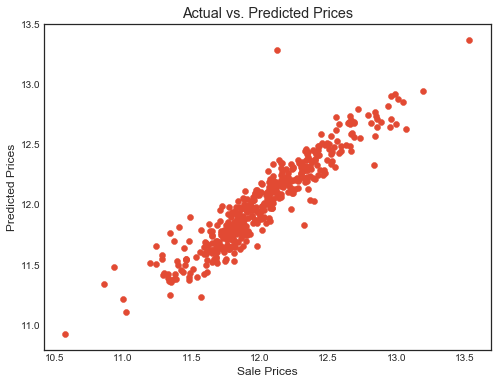

In [43]:
plt.scatter(test['SalePrice'], lm.predict(test.drop('SalePrice', axis=1)))
plt.xlabel('Sale Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')

#convert back from log

XGBoost, Ridge, Lasso and Elastic-Net regularization
https://www.kaggle.com/tannercarbonati/detailed-data-analysis-ensemble-modeling

### Lasso Model

In [ ]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

def log_transform(feature):
    train[feature] = np.log1p(train[feature].values)

def quadratic(feature):
    train[feature+'2'] = train[feature]**2
    
log_transform('GrLivArea')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')

quadratic('OverallQual')
quadratic('YearBuilt')
quadratic('YearRemodAdd')
quadratic('TotalBsmtSF')
quadratic('2ndFlrSF')
quadratic('Neighborhood_E')
quadratic('RoofMatl_E')
quadratic('GrLivArea')

qdr = ['OverallQual2', 'YearBuilt2', 'YearRemodAdd2', 'TotalBsmtSF2',
        '2ndFlrSF2', 'Neighborhood_E2', 'RoofMatl_E2', 'GrLivArea2']

train['HasBasement'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasGarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['Has2ndFloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasMasVnr'] = train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
train['HasWoodDeck'] = train['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPorch'] = train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['IsNew'] = train['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

boolean = ['HasBasement', 'HasGarage', 'Has2ndFloor', 'HasMasVnr', 'HasWoodDeck',
            'HasPorch', 'HasPool', 'IsNew']


features = quantitative + qual_encoded + boolean + qdr
lasso = linear_model.LassoLarsCV(max_iter=10000)
X = train[features].fillna(0.).values
Y = train['SalePrice'].values
lasso.fit(X, np.log(Y))

Ypred = np.exp(lasso.predict(X))
error(Y, Ypred)

Can also use lasso or ridge regression as wrapper filter methods for best feature selection

In [ ]:
import patsy

Y, X = patsy.dmatrices(
    "SalePrice ~ \
        GarageCars + \
        np.log1p(BsmtFinSF1) + \
        ScreenPorch + \
        Condition1_E + \
        Condition2_E + \
        WoodDeckSF + \
        np.log1p(LotArea) + \
        Foundation_E + \
        MSZoning_E + \
        MasVnrType_E + \
        HouseStyle_E + \
        Fireplaces + \
        CentralAir_E + \
        BsmtFullBath + \
        EnclosedPorch + \
        PavedDrive_E + \
        ExterQual_E + \
        bs(OverallCond, df=7, degree=1) + \
        bs(MSSubClass, df=7, degree=1) + \
        bs(LotArea, df=2, degree=1) + \
        bs(FullBath, df=3, degree=1) + \
        bs(HalfBath, df=2, degree=1) + \
        bs(BsmtFullBath, df=3, degree=1) + \
        bs(TotRmsAbvGrd, df=2, degree=1) + \
        bs(LandSlope_E, df=2, degree=1) + \
        bs(LotConfig_E, df=2, degree=1) + \
        bs(SaleCondition_E, df=3, degree=1) + \
        OverallQual + np.square(OverallQual) + \
        GrLivArea + np.square(GrLivArea) + \
        Q('1stFlrSF') + np.square(Q('1stFlrSF')) + \
        Q('2ndFlrSF') + np.square(Q('2ndFlrSF')) +  \
        TotalBsmtSF + np.square(TotalBsmtSF) +  \
        KitchenAbvGr + np.square(KitchenAbvGr) +  \
        YearBuilt + np.square(YearBuilt) + \
        Neighborhood_E + np.square(Neighborhood_E) + \
        Neighborhood_E:OverallQual + \
        MSSubClass:BldgType_E + \
        ExterQual_E:OverallQual + \
        PoolArea:PoolQC_E + \
        Fireplaces:FireplaceQu_E + \
        OverallQual:KitchenQual_E + \
        GarageQual_E:GarageCond + \
        GarageArea:GarageCars + \
        Q('1stFlrSF'):TotalBsmtSF + \
        TotRmsAbvGrd:GrLivArea",
    train.to_dict('list'))

ridge = linear_model.RidgeCV(cv=10)
ridge.fit(X, np.log(Y))
Ypred = np.exp(ridge.predict(X))
print(error(Y,Ypred))

In [ ]:
import copy
X_train_rare = copy.copy(X_train)
X_test_rare = copy.copy(X_test)
X_train_rare["test"]=0
X_test_rare["test"]=1
temp_df = pandas.concat([X_train_rare,X_test_rare],axis=0)
names = list(X_train_rare.columns.values)
temp_df = pandas.concat([X_train_rare,X_test_rare],axis=0)
for i in names:
    temp_df.loc[temp_df[i].value_counts()[temp_df[i]].values < 20, i] = "RARE_VALUE"
for i in range(temp_df.shape[1]):
    temp_df.iloc[:,i]=temp_df.iloc[:,i].astype('str')
X_train_rare = temp_df[temp_df["test"]=="0"].iloc[:,:-1].values
X_test_rare = temp_df[temp_df["test"]=="1"].iloc[:,:-1].values
for i in range(X_train_rare.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(temp_df.iloc[:,:-1].iloc[:, i])
    les.append(le)
    X_train_rare[:, i] = le.transform(X_train_rare[:, i])
    X_test_rare[:, i] = le.transform(X_test_rare[:, i])
enc.fit(X_train_rare)
X_train_rare = enc.transform(X_train_rare)
X_test_rare = enc.transform(X_test_rare)
l.fit(X_train_rare,y_train)
y_pred = l.predict_proba(X_test_rare)
print(log_loss(y_test,y_pred))
r.fit(X_train_rare,y_train)
y_pred = r.predict_proba(X_test_rare)
print(log_loss(y_test,y_pred))
print(X_train_rare.shape)